<a href="https://colab.research.google.com/github/Matt4228/Intro-To-Machine-Learning-Final-Project/blob/main/COMP562FinalProj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [4]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.activations import relu,linear
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

In [5]:
from PIL import Image
from google.colab import files
import os

In [18]:
df = pd.read_csv('3000.csv')

In [19]:
df.columns = ['label'] + [f'pixel_{i}' for i in range(784)]

In [20]:
df.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.shape

(74283, 785)

In [22]:
Y = df.label
X = df.drop('label', axis=1)

In [23]:
Y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [24]:
letters = [chr(i) for i in range(65, 91)]
letters

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

<BarContainer object of 26 artists>

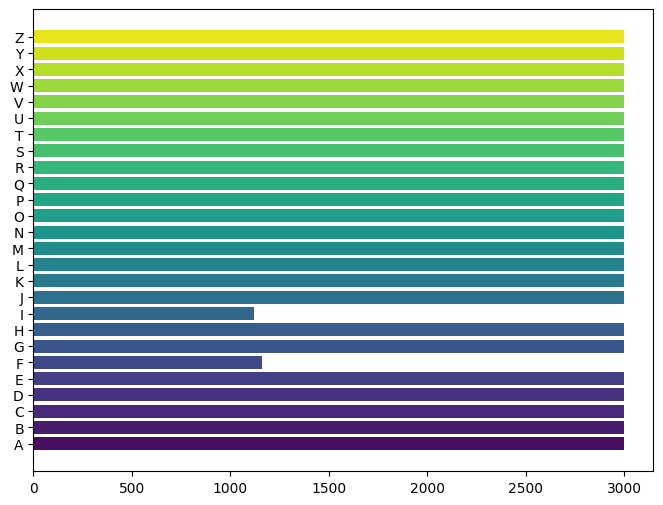

In [25]:
plt.figure(figsize=(8,6))
plt.barh(letters, Y.value_counts().sort_index(), color=sns.color_palette('viridis', 26))

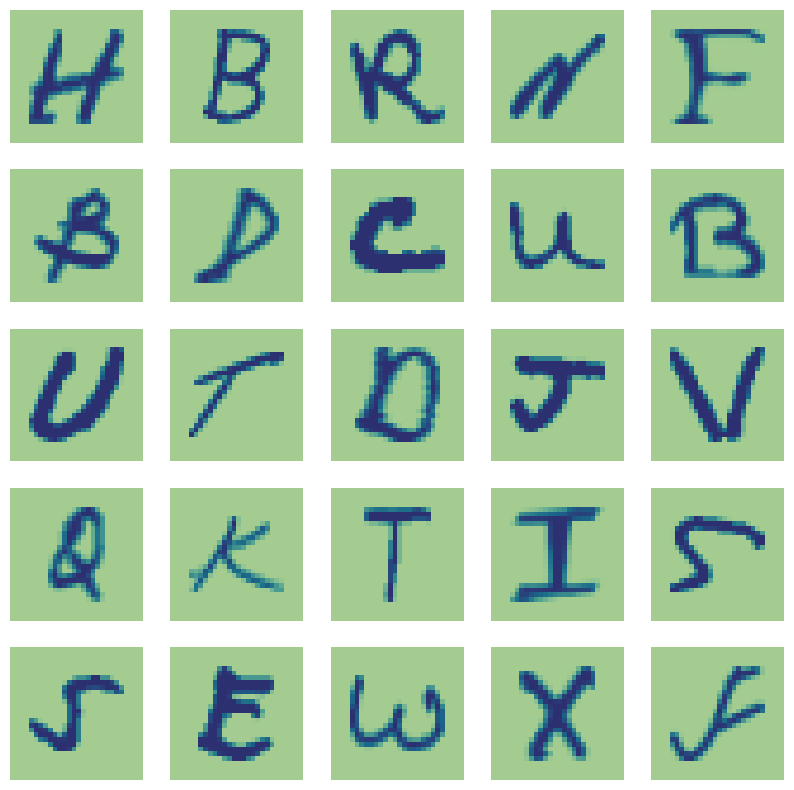

In [26]:
random_indices = np.random.choice(range(len(X)), size=25, replace=False)
_, axes = plt.subplots(5, 5, figsize=(10, 10))
for i,ax in enumerate(axes.ravel()):
    ax.imshow(X.iloc[random_indices[i]].values.reshape(28, 28), cmap='crest')
    ax.axis('off')
plt.show()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_train.shape, x_test.shape,

((51998, 784), (22285, 784))

In [28]:
model = Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 26)                1690      
                                                                 
Total params: 110426 (431.35 KB)
Trainable params: 110426 (431.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1625/1625 [==============================] - 17s 9ms/step - loss: 9.3949 - accuracy: 0.1180 - val_loss: 3.0021 - val_accuracy: 0.1548
Epoch 2/15
1625/1625 [==============================] - 7s 4ms/step - loss: 2.7001 - accuracy: 0.2485 - val_loss: 2.3931 - val_accuracy: 0.3403
Epoch 3/15
1625/1625 [==============================] - 9s 6ms/step - loss: 2.1792 - accuracy: 0.3936 - val_loss: 2.0078 - val_accuracy: 0.4361
Epoch 4/15
1625/1625 [==============================] - 7s 4ms/step - loss: 1.7933 - accuracy: 0.4875 - val_loss: 1.7108 - val_accuracy: 0.5357
Epoch 5/15
1625/1625 [==============================] - 8s 5ms/step - loss: 1.4901 - accuracy: 0.5722 - val_loss: 1.4332 - val_accuracy: 0.6088
Epoch 6/15
1625/1625 [==============================] - 6s 4ms/step - loss: 1.2398 - accuracy: 0.6462 - val_loss: 1.2230 - val_accuracy: 0.6722
Epoch 7/15
1625/1625 [==============================] - 8s 5ms/step - loss: 0.9992 - accuracy: 0.7166 - val_loss: 0.9891 - val_accuracy

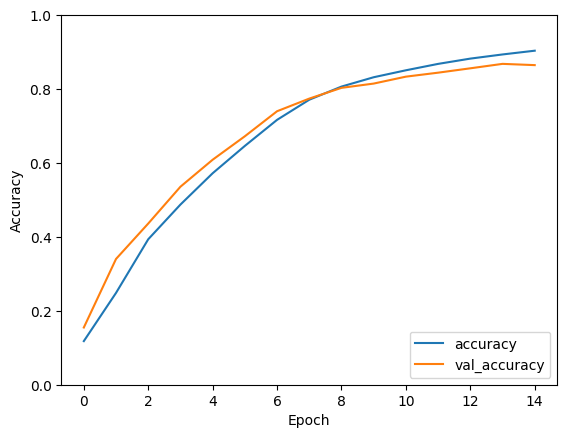

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

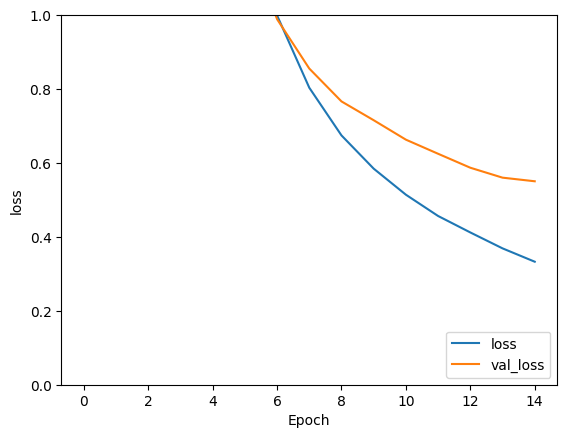

In [31]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [32]:
_,test_acc = model.evaluate(x_test, y_test)
print(f'Accuracy: {test_acc}')

697/697 [==============================] - 4s 5ms/step - loss: 0.5505 - accuracy: 0.8647
Accuracy: 0.8647072315216064


In [33]:
z = model.predict(x_test)

697/697 [==============================] - 1s 2ms/step


In [34]:
print(z[0])

[  4.459088    10.756468    10.524806     8.465756    13.256457
  -8.673881    12.126561    -3.6431825   -7.0891447    2.2128963
  -3.893191    -5.793619     1.6813977    3.3830729    8.737104
   0.52062994  11.043442     5.9320464    9.397102    -8.987887
  -6.0233545  -16.341934    -0.4823596   -8.484597    -0.6691861
   2.7972593 ]


In [35]:
prediction = tf.nn.softmax(z)
print(prediction[0])

tf.Tensor(
[9.3241899e-05 5.0644029e-02 4.0171571e-02 5.1248949e-03 6.1696410e-01
 1.8451650e-10 1.9932061e-01 2.8238386e-08 9.0007185e-10 9.8651190e-06
 2.1991868e-08 3.2878895e-09 5.7979610e-06 3.1790951e-05 6.7224856e-03
 1.8161860e-06 6.7477569e-02 4.0673229e-04 1.3006586e-02 1.3479189e-10
 2.6130276e-09 8.6266335e-14 6.6614291e-07 2.2296665e-10 5.5262382e-07
 1.7696522e-05], shape=(26,), dtype=float32)


In [36]:
prediction = np.argmax(prediction, axis=1)
prediction

array([ 4,  1,  1, ...,  9, 18,  0])

In [37]:
wrong_predicts = np.where(prediction != y_test)[0]
wrong_predicts.shape

(3015,)

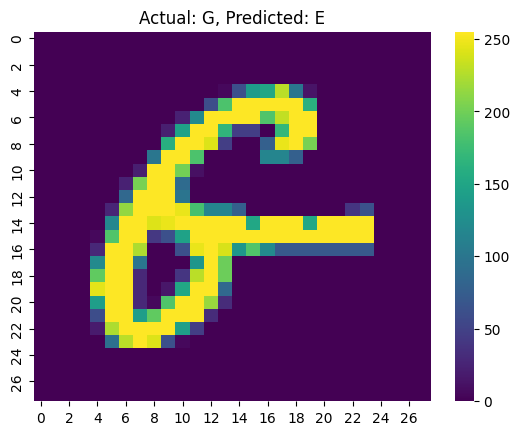

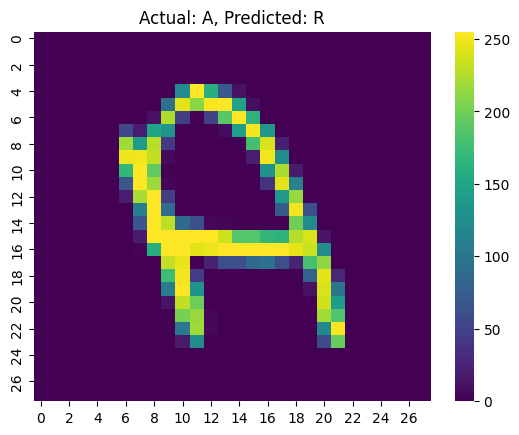

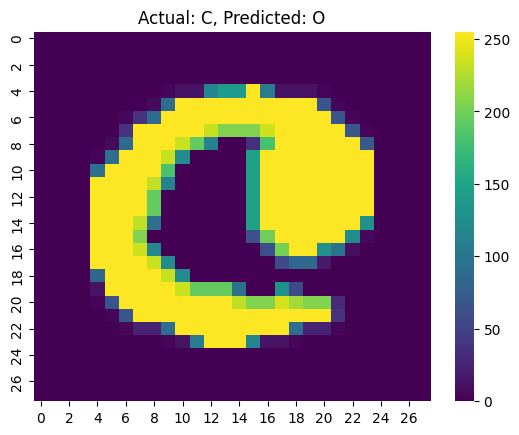

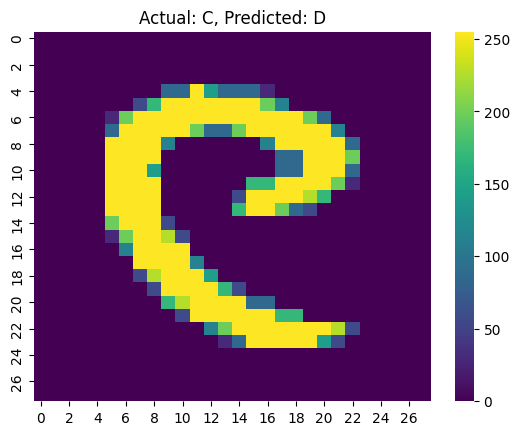

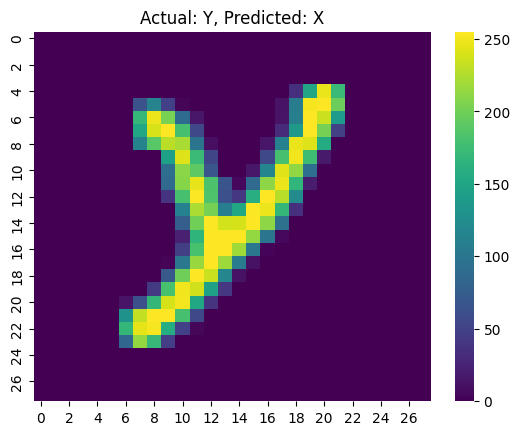

In [38]:
for i in range(5):
    sns.heatmap(x_test.iloc[wrong_predicts[i]].values.reshape(28, 28), cmap='viridis')
    plt.title(f'Actual: {chr(y_test.iloc[wrong_predicts[i]]+65)}, Predicted: {chr(prediction[wrong_predicts[i]]+65)}')
    plt.show()

**Test 1**

In [39]:
name_data = pd.DataFrame()

name_files = [file for file in os.listdir("Matthew") if file.endswith('.png')]
name_files = sorted(name_files)

threshold = 100

for filename in name_files:
  image_path = os.path.join("Matthew", filename)
  original_image = Image.open(image_path)

  resized_image = original_image.resize((28, 28))
  resized_image = resized_image.convert("L")

  resized_image = Image.eval(resized_image, lambda x: 255 - x)

  mask = resized_image.point(lambda p: p < threshold and 255)


  inverted_mask = Image.eval(mask, lambda p:255-p)
  resized_image = Image.composite(resized_image, Image.new('RGB', resized_image.size, (0,0,0)), inverted_mask)

  resized_image = resized_image.convert("L")
  pixel_values = list(resized_image.getdata())
  df_temp = pd.DataFrame([pixel_values])
  name_data = pd.concat([name_data, df_temp], ignore_index=True)

name_files = [file for file in os.listdir("Paul") if file.endswith('.png')]
name_files = sorted(name_files)

for filename in name_files:
  image_path = os.path.join("Paul", filename)
  original_image = Image.open(image_path)

  resized_image = original_image.resize((28, 28))
  resized_image = resized_image.convert("L")

  resized_image = Image.eval(resized_image, lambda x: 255 - x)

  mask = resized_image.point(lambda p: p < threshold and 255)


  inverted_mask = Image.eval(mask, lambda p:255-p)
  resized_image = Image.composite(resized_image, Image.new('RGB', resized_image.size, (0,0,0)), inverted_mask)

  resized_image = resized_image.convert("L")
  pixel_values = list(resized_image.getdata())
  df_temp = pd.DataFrame([pixel_values])
  name_data = pd.concat([name_data, df_temp], ignore_index=True)

name_files = [file for file in os.listdir("Sam") if file.endswith('.png')]
name_files = sorted(name_files)

for filename in name_files:
  image_path = os.path.join("Sam", filename)
  original_image = Image.open(image_path)

  resized_image = original_image.resize((28, 28))
  resized_image = resized_image.convert("L")

  resized_image = Image.eval(resized_image, lambda x: 255 - x)

  mask = resized_image.point(lambda p: p < threshold and 255)


  inverted_mask = Image.eval(mask, lambda p:255-p)
  resized_image = Image.composite(resized_image, Image.new('RGB', resized_image.size, (0,0,0)), inverted_mask)

  resized_image = resized_image.convert("L")
  pixel_values = list(resized_image.getdata())
  df_temp = pd.DataFrame([pixel_values])
  name_data = pd.concat([name_data, df_temp], ignore_index=True)

name_files = [file for file in os.listdir("Vishal") if file.endswith('.png')]
name_files = sorted(name_files)

for filename in name_files:
  image_path = os.path.join("Vishal", filename)
  original_image = Image.open(image_path)

  resized_image = original_image.resize((28, 28))
  resized_image = resized_image.convert("L")

  resized_image = Image.eval(resized_image, lambda x: 255 - x)

  mask = resized_image.point(lambda p: p < threshold and 255)


  inverted_mask = Image.eval(mask, lambda p:255-p)
  resized_image = Image.composite(resized_image, Image.new('RGB', resized_image.size, (0,0,0)), inverted_mask)

  resized_image = resized_image.convert("L")
  pixel_values = list(resized_image.getdata())
  df_temp = pd.DataFrame([pixel_values])
  name_data = pd.concat([name_data, df_temp], ignore_index=True)



labels = [12,0,19,19,7,4,22,15,0,20,8,18,0,12,21,8,18,7,0,11]
labels_df = pd.DataFrame(labels)
name_data = pd.concat([labels_df, name_data], axis=1)

In [40]:
name_data.columns = ['label'] + [f'pixel_{i}' for i in range(784)]

Y_name = name_data.iloc[:, :1]
X_name = name_data.iloc[:, 1:]

n = model.predict(X_name)

1/1 [==============================] - 0s 28ms/step


In [41]:
prediction_name = tf.nn.softmax(n)
prediction_name = np.argmax(prediction_name, axis=1)

In [42]:
wrong_predicts = np.where(prediction_name != labels)[0]
exp_acc = 1 - len(wrong_predicts)/20
print(f"Experimental Accuracy: {exp_acc:.1%}")

Experimental Accuracy: 20.0%


<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


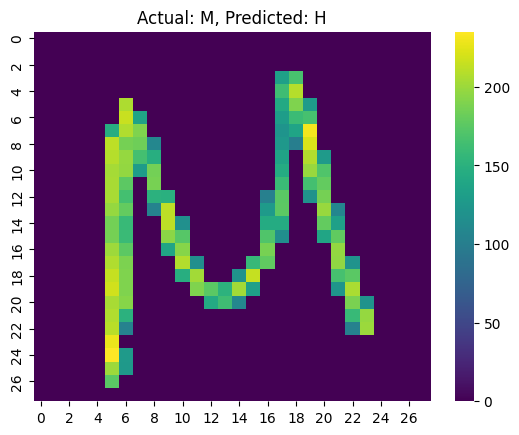

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


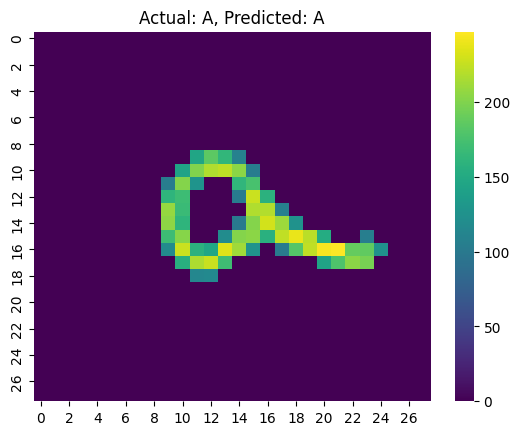

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


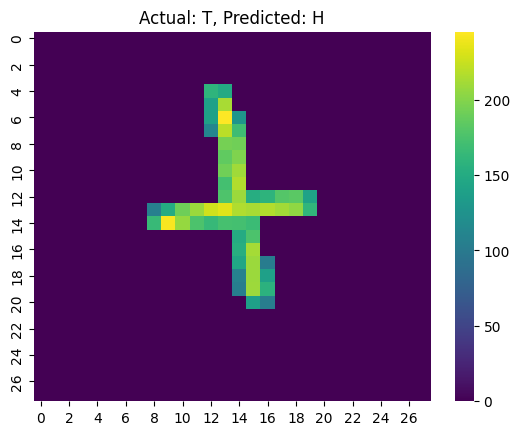

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


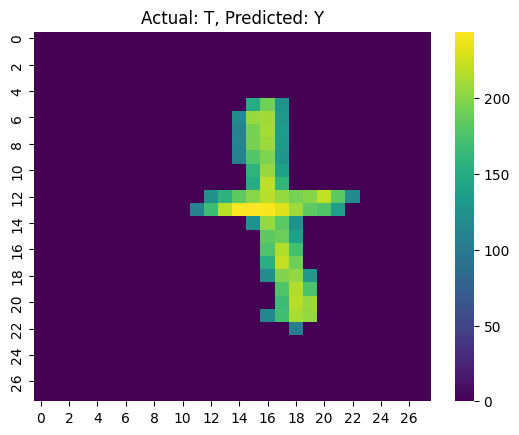

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


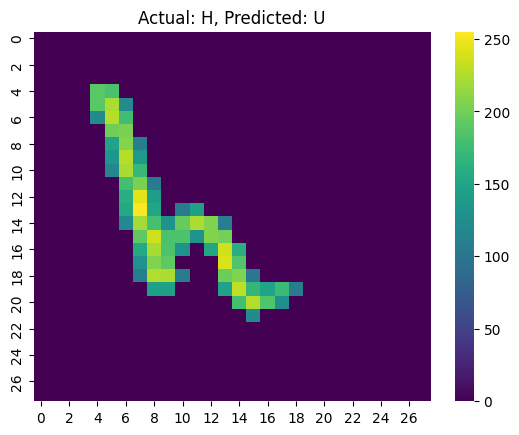

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


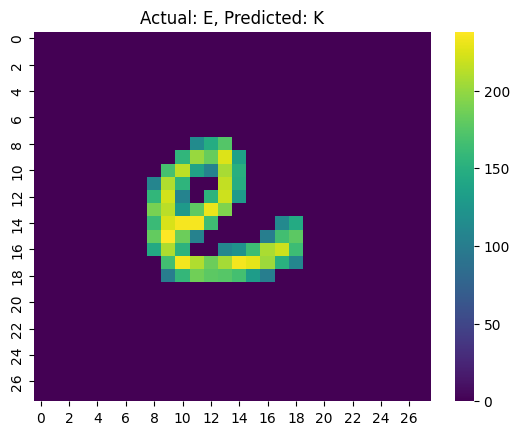

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


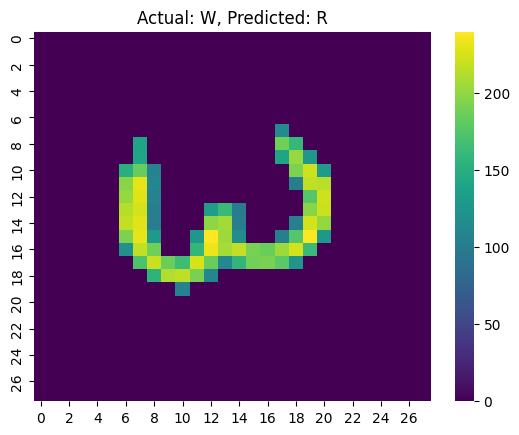

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


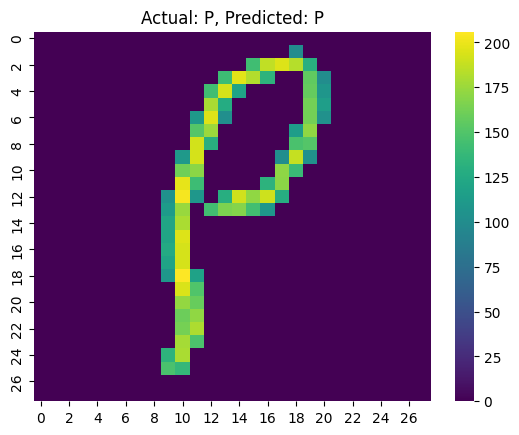

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


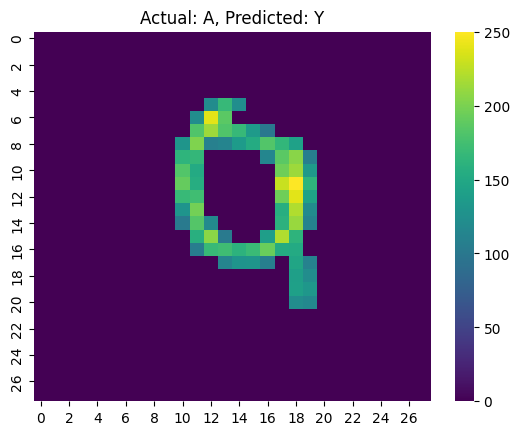

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


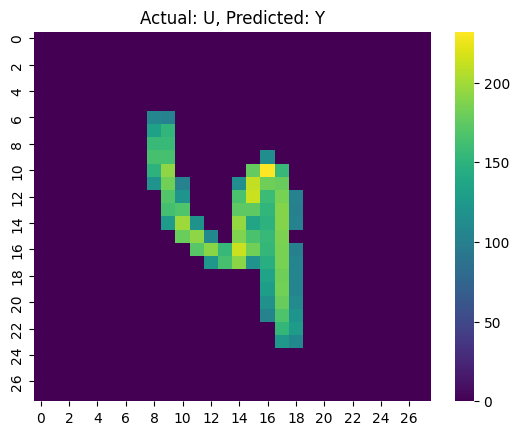

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


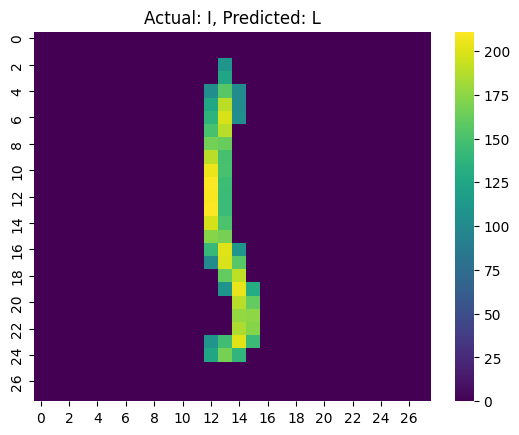

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


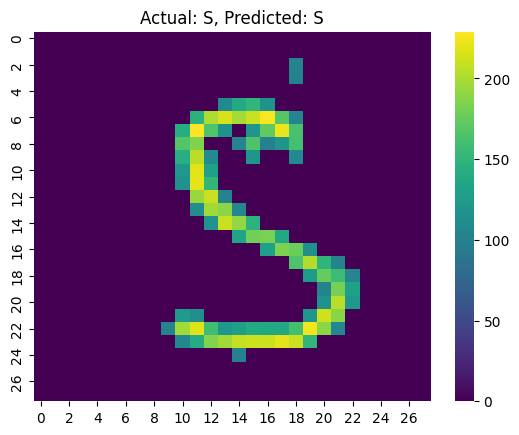

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


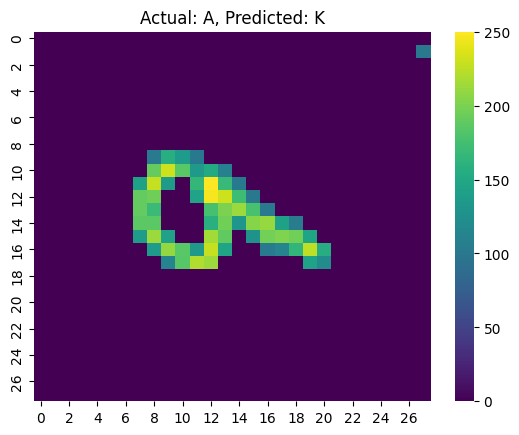

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


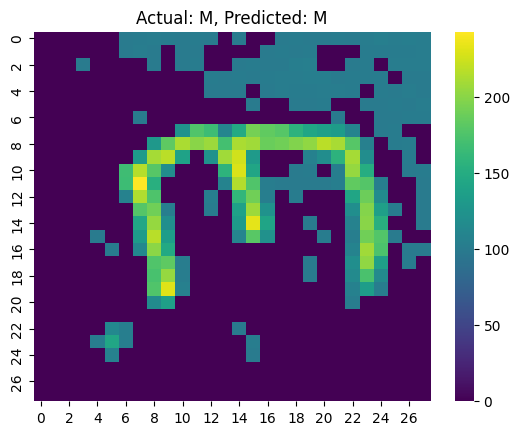

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


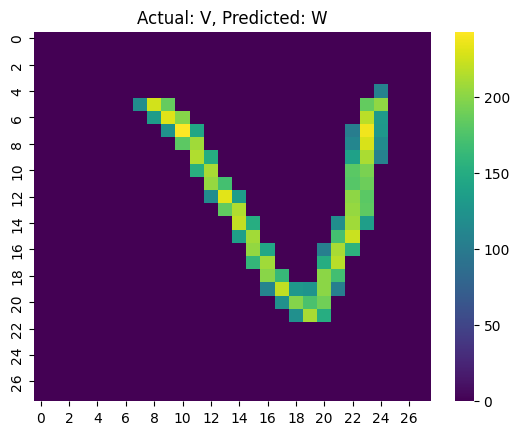

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


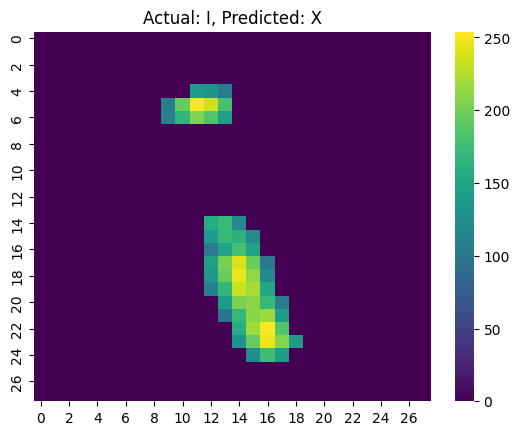

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


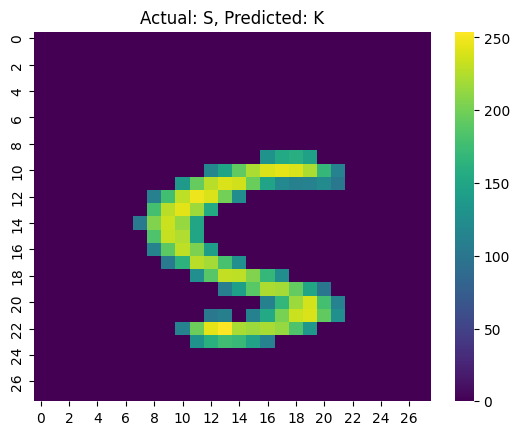

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


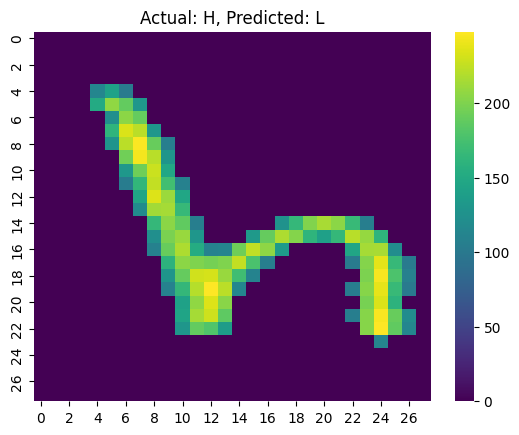

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


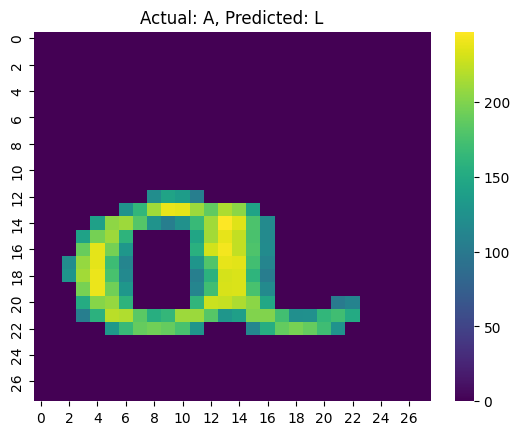

<ipython-input-43-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


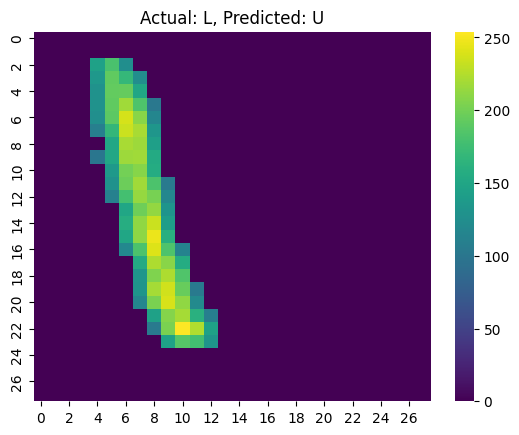

In [43]:
for i in range(20):
    sns.heatmap(X_name.iloc[i].values.reshape(28, 28), cmap='viridis')
    plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')
    plt.show()

**Test 2**

In [44]:

max_acc = 0
one = 0
two = 0
three = 0
four = 0

for a in range(255):
  name_data = pd.DataFrame()

  name_files = [file for file in os.listdir("Matthew") if file.endswith('.png')]
  name_files = sorted(name_files)

  threshold1 = a
  threshold2 = 0
  threshold3 = 96
  threshold4 = 79

  for filename in name_files:
    image_path = os.path.join("Matthew", filename)
    original_image = Image.open(image_path)

    resized_image = original_image.resize((28, 28))
    resized_image = resized_image.convert("L")

    resized_image = Image.eval(resized_image, lambda x: 255 - x)

    mask = resized_image.point(lambda p: p < threshold1 and 255)


    inverted_mask = Image.eval(mask, lambda p:255-p)
    resized_image = Image.composite(resized_image, Image.new('RGB', resized_image.size, (0,0,0)), inverted_mask)

    resized_image = resized_image.convert("L")
    pixel_values = list(resized_image.getdata())
    df_temp = pd.DataFrame([pixel_values])
    name_data = pd.concat([name_data, df_temp], ignore_index=True)

  name_files = [file for file in os.listdir("Paul") if file.endswith('.png')]
  name_files = sorted(name_files)

  for filename in name_files:
    image_path = os.path.join("Paul", filename)
    original_image = Image.open(image_path)

    resized_image = original_image.resize((28, 28))
    resized_image = resized_image.convert("L")

    resized_image = Image.eval(resized_image, lambda x: 255 - x)

    mask = resized_image.point(lambda p: p < threshold2 and 255)


    inverted_mask = Image.eval(mask, lambda p:255-p)
    resized_image = Image.composite(resized_image, Image.new('RGB', resized_image.size, (0,0,0)), inverted_mask)

    resized_image = resized_image.convert("L")
    pixel_values = list(resized_image.getdata())
    df_temp = pd.DataFrame([pixel_values])
    name_data = pd.concat([name_data, df_temp], ignore_index=True)

  name_files = [file for file in os.listdir("Sam") if file.endswith('.png')]
  name_files = sorted(name_files)

  for filename in name_files:
    image_path = os.path.join("Sam", filename)
    original_image = Image.open(image_path)

    resized_image = original_image.resize((28, 28))
    resized_image = resized_image.convert("L")

    resized_image = Image.eval(resized_image, lambda x: 255 - x)

    mask = resized_image.point(lambda p: p < threshold3 and 255)


    inverted_mask = Image.eval(mask, lambda p:255-p)
    resized_image = Image.composite(resized_image, Image.new('RGB', resized_image.size, (0,0,0)), inverted_mask)

    resized_image = resized_image.convert("L")
    pixel_values = list(resized_image.getdata())
    df_temp = pd.DataFrame([pixel_values])
    name_data = pd.concat([name_data, df_temp], ignore_index=True)

  name_files = [file for file in os.listdir("Vishal") if file.endswith('.png')]
  name_files = sorted(name_files)

  for filename in name_files:
    image_path = os.path.join("Vishal", filename)
    original_image = Image.open(image_path)

    resized_image = original_image.resize((28, 28))
    resized_image = resized_image.convert("L")

    resized_image = Image.eval(resized_image, lambda x: 255 - x)

    mask = resized_image.point(lambda p: p < threshold4 and 255)


    inverted_mask = Image.eval(mask, lambda p:255-p)
    resized_image = Image.composite(resized_image, Image.new('RGB', resized_image.size, (0,0,0)), inverted_mask)

    resized_image = resized_image.convert("L")
    pixel_values = list(resized_image.getdata())
    df_temp = pd.DataFrame([pixel_values])
    name_data = pd.concat([name_data, df_temp], ignore_index=True)


  labels = [12,0,19,19,7,4,22,15,0,20,8,18,0,12,21,8,18,7,0,11]
  labels_df = pd.DataFrame(labels)
  name_data = pd.concat([labels_df, name_data], axis=1)

  name_data.columns = ['label'] + [f'pixel_{i}' for i in range(784)]

  Y_name = name_data.iloc[:, :1]
  X_name = name_data.iloc[:, 1:]

  n = model.predict(X_name)

  prediction_name = tf.nn.softmax(n)
  prediction_name = np.argmax(prediction_name, axis=1)

  wrong_predicts = np.where(prediction_name != labels)[0]
  exp_acc = 1 - len(wrong_predicts)/20
  if exp_acc > max_acc:
    print(a)
    print(exp_acc)
    max_acc = exp_acc
    one = a

print(max_acc)


1/1 [==============================] - 0s 32ms/step
0
0.25
1/1 [==============================] - 0s 21ms/step
0.25


<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


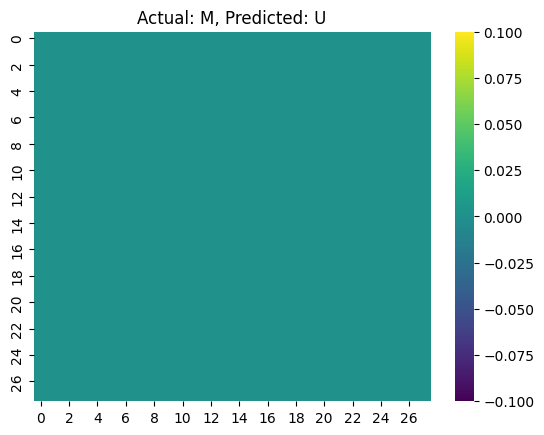

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


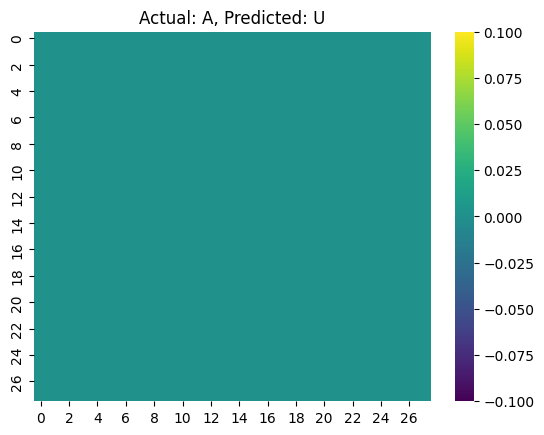

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


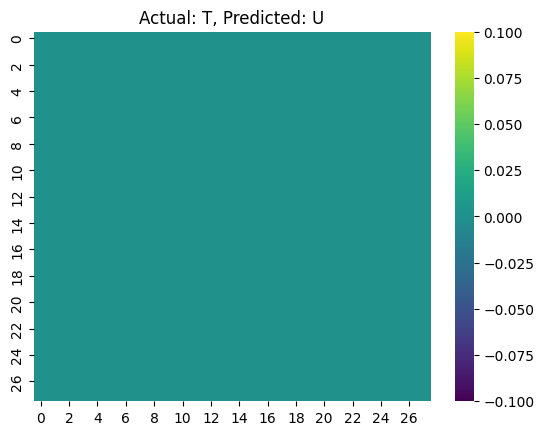

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


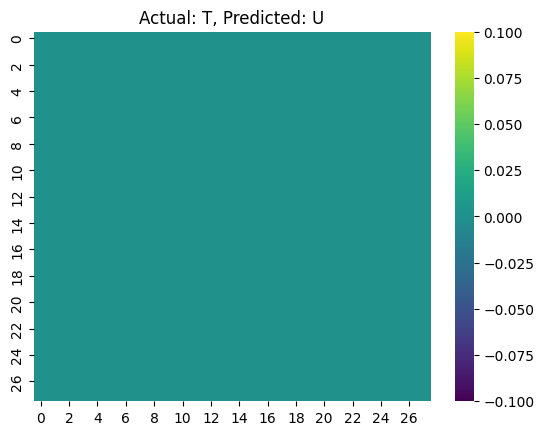

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


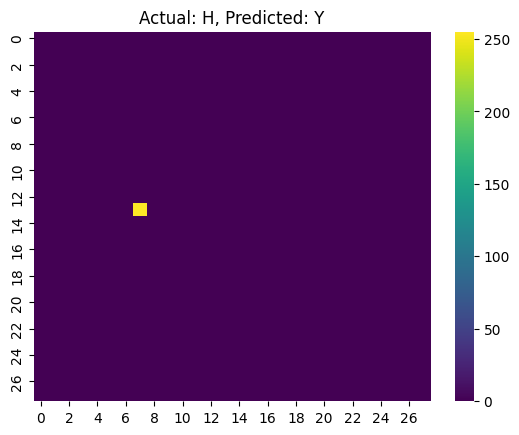

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


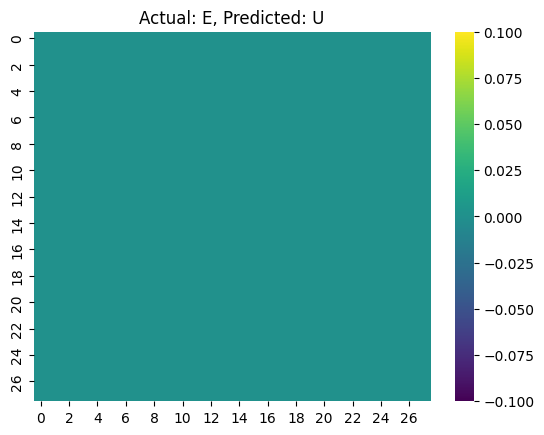

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


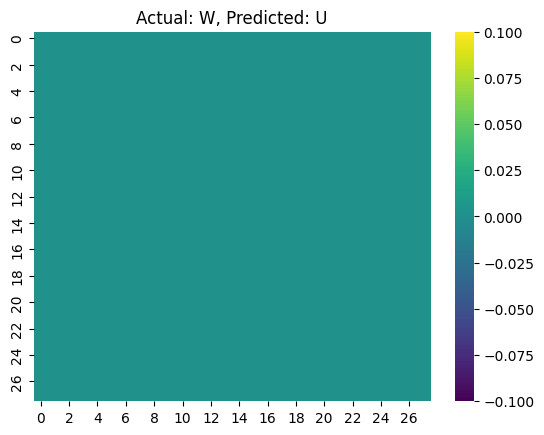

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


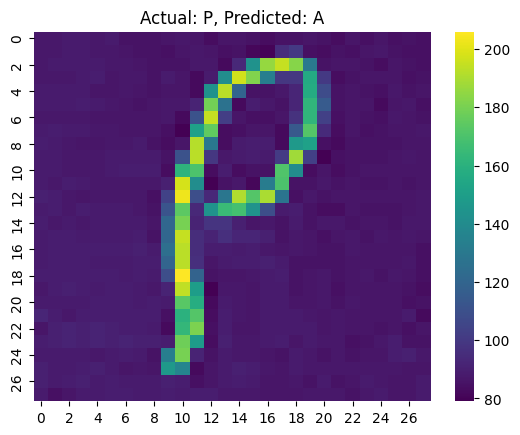

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


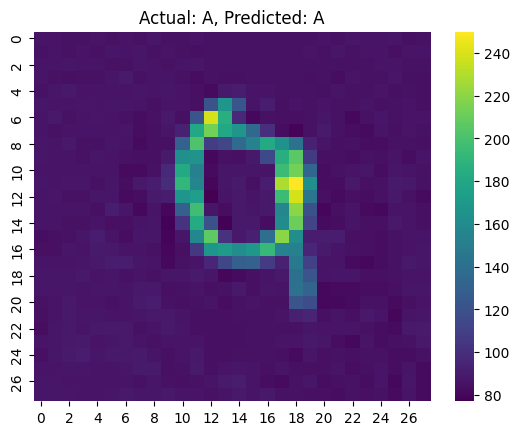

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


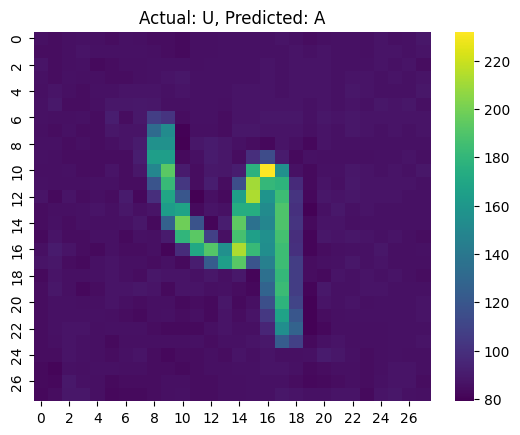

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


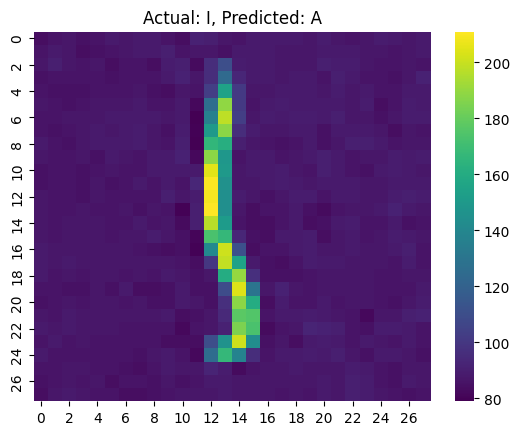

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


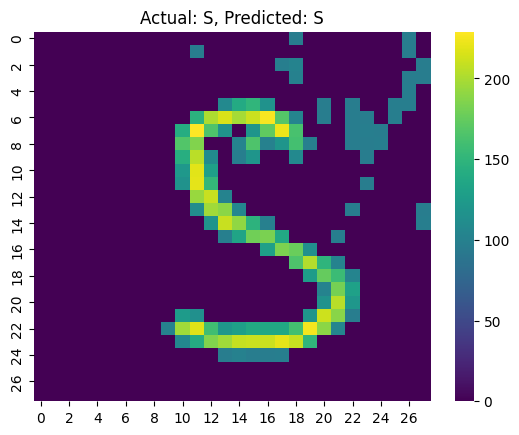

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


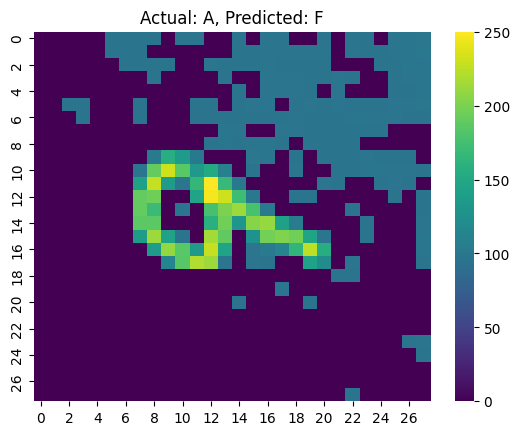

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


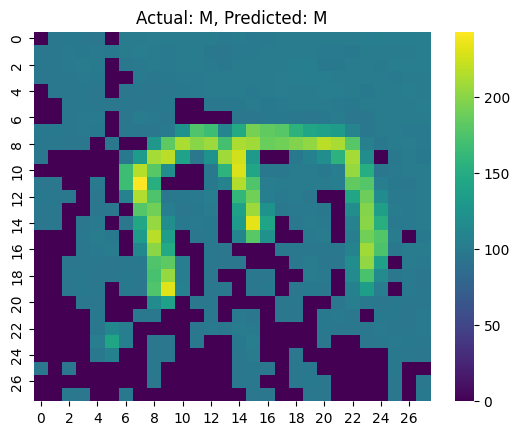

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


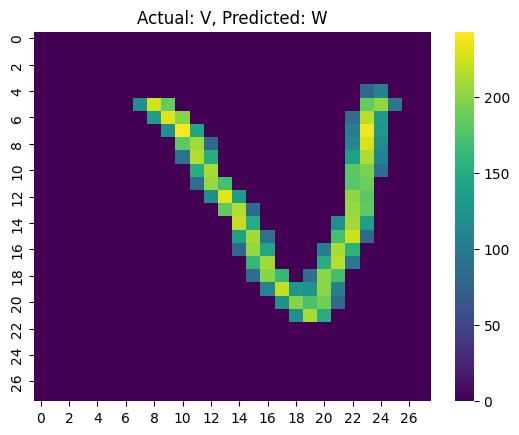

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


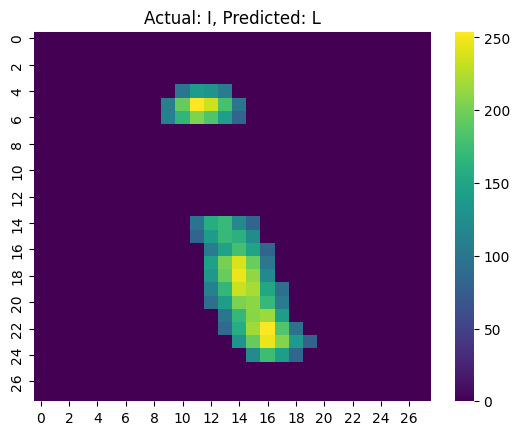

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


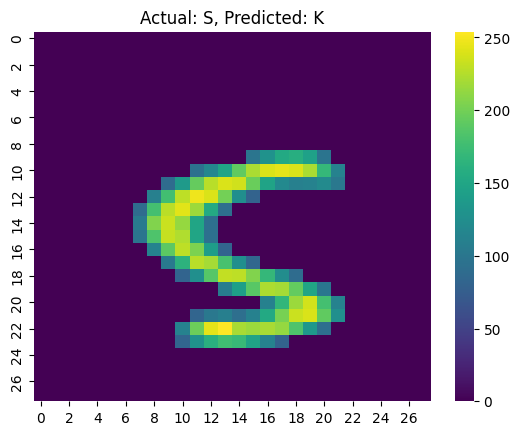

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


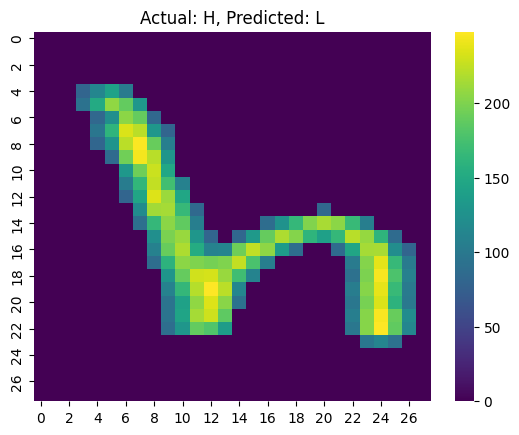

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


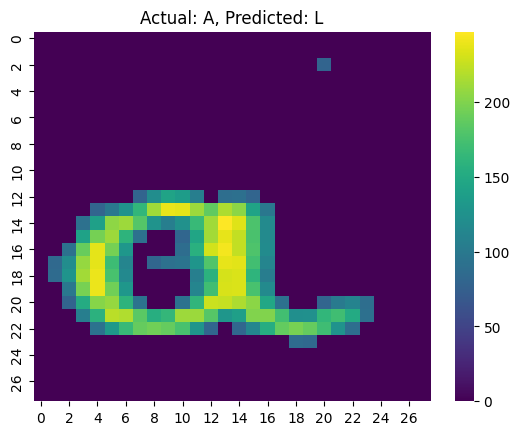

<ipython-input-45-4c31576955c5>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')


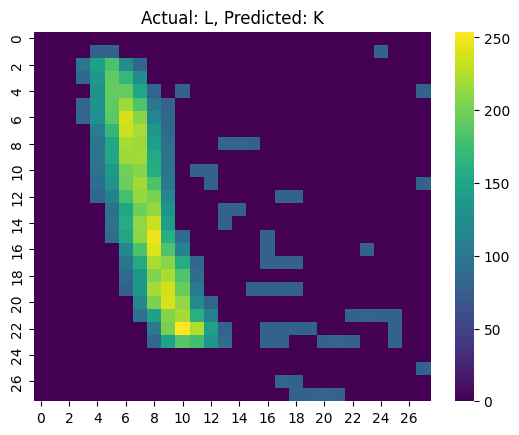

In [45]:
for i in range(20):
    sns.heatmap(X_name.iloc[i].values.reshape(28, 28), cmap='viridis')
    plt.title(f'Actual: {chr(int(Y_name.iloc[i])+65)}, Predicted: {chr(prediction_name[i]+65)}')
    plt.show()